In [8]:
import pandas as pd

In [30]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
X_val = pd.read_csv('X_val.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
y_val = pd.read_csv('y_val.csv')

In [31]:
data_cleaned = pd.read_csv('data_cleaned.csv')

In [32]:
data_cleaned['Sentiment'] = data_cleaned['Sentiment'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4})

In [33]:
from sklearn.model_selection import train_test_split

X = data_cleaned['TweetText_clean']
y = data_cleaned['Sentiment']

# Split the data first
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [34]:
print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)

X train shape:  (28528,)
y train shape:  (28528,)


In [35]:
import numpy as np

(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 6306],
       [   1, 6294],
       [   2, 5942],
       [   3, 5748],
       [   4, 4238]], dtype=int64)

In [36]:
X_train

23675           girl bullied high school bffs selena gomez
9041     womens sport dumb pay watch womens sport woman...
12963    um even muslim nation act like riddin pedophil...
7406     care joke raping man woman transgender care ev...
11405    act child rape joke better gay joke hypocritic...
                               ...                        
17042    also said lot wrong thing generalizing hindu p...
5472                               still call female bitch
34050    since white people say say clear voice haha fu...
336                      awful come dine one get drunk mkr
27546    obviously know either seen keiras hurt like cr...
Name: TweetText_clean, Length: 28528, dtype: object

In [37]:
y_train

23675    1
9041     3
12963    0
7406     3
11405    3
        ..
17042    0
5472     3
34050    2
336      4
27546    1
Name: Sentiment, Length: 28528, dtype: int64

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

max_len = 97
# max_len = 97
X_train = pad_sequences(X_train, maxlen=max_len, padding='pre', truncating='pre')
X_test = pad_sequences(X_test, maxlen=max_len, padding='pre', truncating='pre')
X_val = pad_sequences(X_val, maxlen=max_len, padding='pre', truncating='pre')

In [39]:
print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)

X train shape:  (28528, 97)
y train shape:  (28528,)


In [40]:
X_train

array([[   0,    0,    0, ...,    1, 6637, 6638],
       [   0,    0,    0, ...,  975,   15,  292],
       [   0,    0,    0, ...,  282,   96,  124],
       ...,
       [   0,    0,    0, ...,    9,    6,  472],
       [   0,    0,    0, ...,   20, 1168,  165],
       [   0,    0,    0, ...,   12, 2314,  536]])

In [41]:
y_train

23675    1
9041     3
12963    0
7406     3
11405    3
        ..
17042    0
5472     3
34050    2
336      4
27546    1
Name: Sentiment, Length: 28528, dtype: int64

In [42]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [43]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 4238],
       [   1, 4238],
       [   2, 4238],
       [   3, 4238],
       [   4, 4238]], dtype=int64)

In [44]:
print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)

X train shape:  (21190, 97)
y train shape:  (21190,)


In [45]:
X_train

array([[   0,    0,    0, ...,   90,  313,  344],
       [   0,    0,    0, ..., 1452,  421,  861],
       [   0,    0,    0, ...,  343,  362,  356],
       ...,
       [   0,    0,    0, ..., 1180,  185, 1125],
       [   0,    0,    0, ..., 1592,  521, 6657],
       [   0,    0,    0, ...,   20, 1168,  165]])

In [46]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
21185    4
21186    4
21187    4
21188    4
21189    4
Name: Sentiment, Length: 21190, dtype: int64

# **Accuracy 0.92, 2 CNN Layers, 1 BiLSTM Layer**

In [164]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dropout, Dense, BatchNormalization

cnn_bilstm_model = Sequential()
cnn_bilstm_model.add(Embedding(input_dim=10000, output_dim=128, input_length=97))
cnn_bilstm_model.add(BatchNormalization())
cnn_bilstm_model.add(Conv1D(filters=128, kernel_size=5, activation='relu')) #Convolutional Layer
cnn_bilstm_model.add(BatchNormalization())
cnn_bilstm_model.add(MaxPooling1D(pool_size=2))
cnn_bilstm_model.add(Conv1D(filters=128, kernel_size=5, activation='relu')) #Convolutional Layer
cnn_bilstm_model.add(BatchNormalization())
cnn_bilstm_model.add(MaxPooling1D(pool_size=2))
cnn_bilstm_model.add(Bidirectional(LSTM(32, return_sequences=False, kernel_regularizer=l2(0.001))))
cnn_bilstm_model.add(Dropout(0.8))
cnn_bilstm_model.add(Dense(16, activation='relu')) # Fully connected layer
cnn_bilstm_model.add(Dense(5, activation='softmax'))

c:\Users\hp\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [165]:
cnn_bilstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
history = cnn_bilstm_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 49s 122ms/step - accuracy: 0.3509 - loss: 1.6576 - val_accuracy: 0.2210 - val_loss: 1.6309
Epoch 2/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 42s 128ms/step - accuracy: 0.8324 - loss: 0.6422 - val_accuracy: 0.7869 - val_loss: 0.6030
Epoch 3/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 42s 126ms/step - accuracy: 0.8999 - loss: 0.4316 - val_accuracy: 0.8918 - val_loss: 0.4120
Epoch 4/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 42s 128ms/step - accuracy: 0.9366 - loss: 0.3133 - val_accuracy: 0.7653 - val_loss: 0.6511
Epoch 5/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 47s 140ms/step - accuracy: 0.9522 - loss: 0.2441 - val_accuracy: 0.9058 - val_loss: 0.3530
Epoch 6/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 43s 128ms/step - accuracy: 0.9596 - loss: 0.2094 - val_accuracy: 0.8738 - val_loss: 0.4413
Epoch 7/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 41s 124ms/step - accuracy: 0.9703 - loss: 0.1653 - val_accuracy: 0.9016 - val_loss: 0.3891
Epoch 8/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 42s 127ms/step - accuracy: 0.9772 - loss: 0

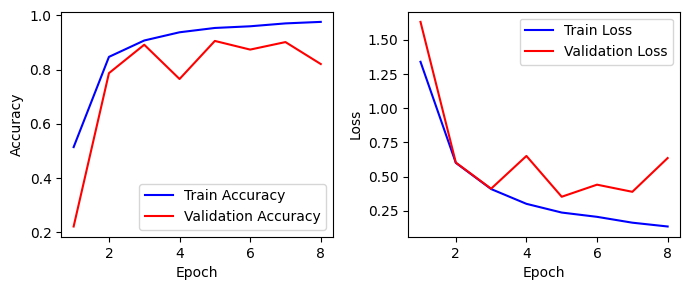

In [166]:
import matplotlib.pyplot as plt
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1) #acc can be loss/accuracy

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc2, 'b', label='Train Accuracy') # b = blue
axes[0].plot(epochs, val_acc, 'r', label='Validation Accuracy') # r = red
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

In [167]:
cnn_bilstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 97, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 97, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 93, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 93, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 46, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 42, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 42, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,462,385 (17.02 MB)

 Trainable params: 1,487,205 (5.67 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 2,974,412 (11.35 MB)

In [168]:
#Evaluate the model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_cnn_bilstm = np.argmax(y_pred_cnn_bilstm, axis=1)  # Returns the index of the highest probability

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_cnn_bilstm)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print(classification_report(y_test, y_pred_cnn_bilstm))

112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       788
           1       0.97      0.95      0.96       787
           2       0.96      0.96      0.96       743
           3       0.95      0.84      0.89       718
           4       0.72      0.86      0.79       530

    accuracy                           0.92      3566
   macro avg       0.91      0.91      0.91      3566
weighted avg       0.92      0.92      0.92      3566



In [169]:
test_loss, test_accuracy = cnn_bilstm_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9143 - loss: 0.3517
Test Loss: 0.3219
Test Accuracy: 0.9176


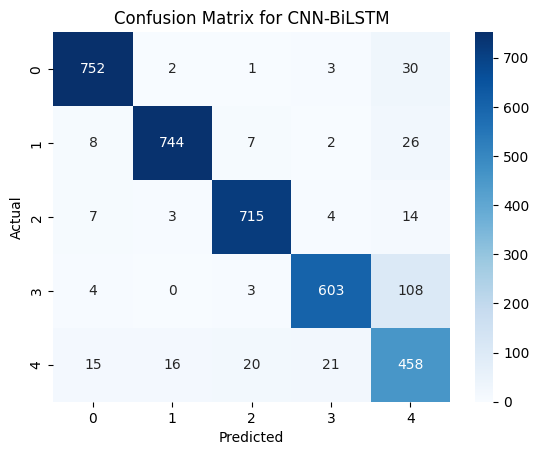

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_cnn_bilstm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CNN-BiLSTM')
plt.show()

112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


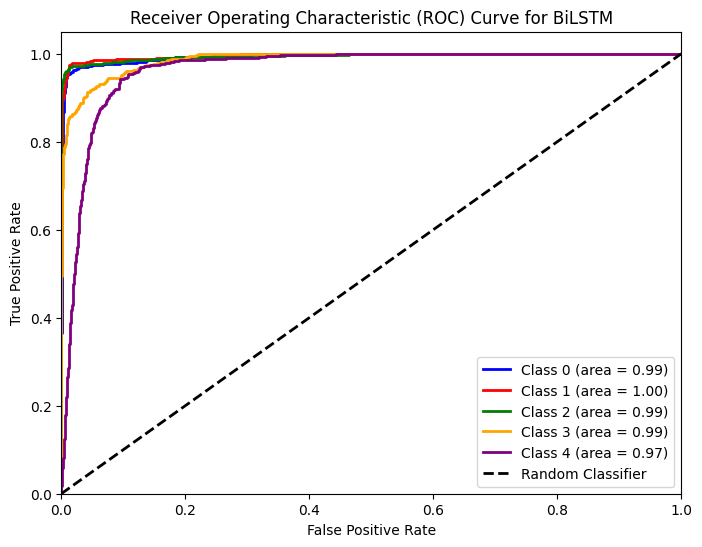

In [171]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the true labels (one-hot encode)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])  # Modify based on number of classes
n_classes = y_test_binarized.shape[1]

# Get the predicted probabilities for each class
y_score = cnn_bilstm_model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  # Add colors if more than 5 classes

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

# Plot ROC curve for random classifier (diagonal)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for BiLSTM')
plt.legend(loc="lower right")
plt.show()

# **Tuning**

In [83]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import kerastuner as kt

def build_cnn_bilstm_model(hp):
    filter1 = hp.Int('filter1', min_value=64, max_value=256, step=64)  # Dense units
    filter2 = hp.Int('filter2', min_value=64, max_value=256, step=64)  # Dense units
    units1 = hp.Int('units1', min_value=32, max_value=128, step=32)  # Dense units
    units2 = hp.Int('units2', min_value=32, max_value=128, step=32)  # Dense units
    output = hp.Int('output', min_value=128, max_value=256, step=64)
    dropout1 = hp.Float('dropout1', min_value=0.5, max_value=0.8, step=0.1)
    activation_1 = hp.Choice('activation_1', values=['relu', 'tanh'])
    activation_2 = hp.Choice('activation_2', values=['relu', 'tanh'])
    activation_3 = hp.Choice('activation_3', values=['relu', 'tanh'])
    batch_size = hp.Choice('batch_size', values=[32, 64, 128])
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])  # Optimizer
    learning_rate = hp.Choice('learning_rate', values=[0.00001,0.0001, 0.001])  # Learning rate
    l2_reg1 = hp.Choice('l2_reg1', values=[0.001, 0.01])  # L2 regularization

    cnn_bilstm_model = Sequential()
    cnn_bilstm_model.add(Embedding(input_dim=10000, output_dim=output, input_length=97))
    cnn_bilstm_model.add(BatchNormalization())
    cnn_bilstm_model.add(Conv1D(filters=filter1, kernel_size=5, activation=activation_1)) #Convolutional Layer
    cnn_bilstm_model.add(BatchNormalization())
    cnn_bilstm_model.add(MaxPooling1D(pool_size=2))
    cnn_bilstm_model.add(Conv1D(filters=filter2, kernel_size=5, activation=activation_2)) #Convolutional Layer
    cnn_bilstm_model.add(BatchNormalization())
    cnn_bilstm_model.add(MaxPooling1D(pool_size=2))
    cnn_bilstm_model.add(Bidirectional(LSTM(units1, return_sequences=False, activation=activation_3 ,kernel_regularizer=l2(l2_reg1))))
    cnn_bilstm_model.add(Dropout(dropout1))
    cnn_bilstm_model.add(Dense(units2, activation='relu')) # Fully connected layer
    cnn_bilstm_model.add(Dense(5, activation='softmax'))

    # Optimizer with gradient clipping
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate, clipnorm=1.0)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate, clipnorm=1.0)
    else:
        optimizer = SGD(learning_rate=learning_rate, clipnorm=1.0)

    cnn_bilstm_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return cnn_bilstm_model

In [84]:
tuner = kt.Hyperband(build_cnn_bilstm_model,
                    objective='val_accuracy', 
                    max_epochs=20,
                    factor=3,
                    directory='my_dir',
                    project_name='hyperband_cnn_bilstm_2c1b')

c:\Users\hp\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [85]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
hyperband = tuner.search(X_train, y_train, validation_data=(X_val, y_val),
                         callbacks=[early_stopping])

Trial 30 Complete [00h 10m 57s]
val_accuracy: 0.9026920795440674

Best val_accuracy So Far: 0.9040942192077637
Total elapsed time: 03h 00m 29s


In [109]:
# Get the best hyperparameter
best_cnn_bilstm_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print('Best CNN-BiLSTM hyperparameters:', best_cnn_bilstm_hps.values)

Best CNN-BiLSTM hyperparameters: {'filter1': 256, 'filter2': 256, 'units1': 32, 'units2': 128, 'output': 192, 'dropout1': 0.8, 'activation_1': 'relu', 'activation_2': 'tanh', 'activation_3': 'tanh', 'batch_size': 128, 'optimizer': 'rmsprop', 'learning_rate': 0.001, 'l2_reg1': 0.001, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}


In [112]:
best_cnn_bilstm_model = tuner.hypermodel.build(best_cnn_bilstm_hps)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
history = best_cnn_bilstm_model.fit(X_train, y_train, epochs=50, batch_size=best_cnn_bilstm_hps.get('batch_size'),
                                validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 68s 371ms/step - accuracy: 0.3253 - loss: 1.7675 - val_accuracy: 0.5238 - val_loss: 1.6040
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 75s 453ms/step - accuracy: 0.7864 - loss: 0.7947 - val_accuracy: 0.5569 - val_loss: 1.3675
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 87s 521ms/step - accuracy: 0.8717 - loss: 0.5308 - val_accuracy: 0.6915 - val_loss: 0.9140
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 81s 485ms/step - accuracy: 0.8870 - loss: 0.4513 - val_accuracy: 0.8177 - val_loss: 0.4787
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 84s 507ms/step - accuracy: 0.9154 - loss: 0.3658 - val_accuracy: 0.7614 - val_loss: 0.5642
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 82s 496ms/step - accuracy: 0.9345 - loss: 0.2866 - val_accuracy: 0.6862 - val_loss: 1.4444
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 81s 488ms/step - accuracy: 0.9440 - loss: 0.2499 - val_accuracy: 0.8929 - val_loss: 0.4706
Epoch 8/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 76s 460ms/step - accuracy: 0.9581 - loss: 0

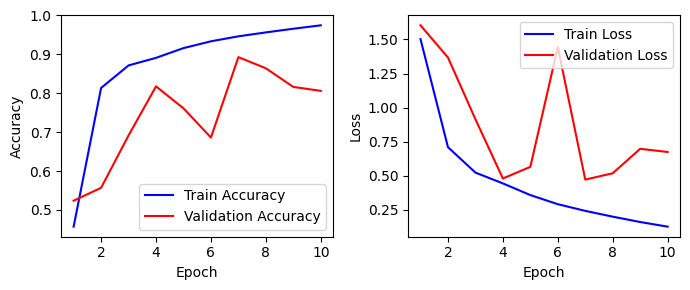

In [113]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc, 'b', label='Train Accuracy') # b = blue
axes[0].plot(epochs, val_acc, 'r', label='Validation Accuracy') # r = red
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

In [114]:
best_cnn_bilstm_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 97, 192)        │     1,920,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 97, 192)        │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 93, 256)        │       246,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 93, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 46, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 42, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 42, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 21, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 64)             │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,158,028 (19.68 MB)

 Trainable params: 2,578,309 (9.84 MB)

 Non-trainable params: 1,408 (5.50 KB)

 Optimizer params: 2,578,311 (9.84 MB)

In [115]:
#Evaluate the model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred_cnn_bilstm = best_cnn_bilstm_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_cnn_bilstm = np.argmax(y_pred_cnn_bilstm, axis=1)  

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_cnn_bilstm)
print(f'Accuracy: {accuracy:.4f}')

# Display the classification report
print(classification_report(y_test, y_pred_cnn_bilstm))

112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step
Accuracy: 0.9091
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       788
           1       0.98      0.95      0.96       787
           2       0.95      0.97      0.96       743
           3       0.98      0.80      0.88       718
           4       0.67      0.92      0.78       530

    accuracy                           0.91      3566
   macro avg       0.91      0.91      0.90      3566
weighted avg       0.93      0.91      0.91      3566



In [116]:
test_loss, test_accuracy = best_cnn_bilstm_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9077 - loss: 0.4319
Test Loss: 0.4193
Test Accuracy: 0.9091


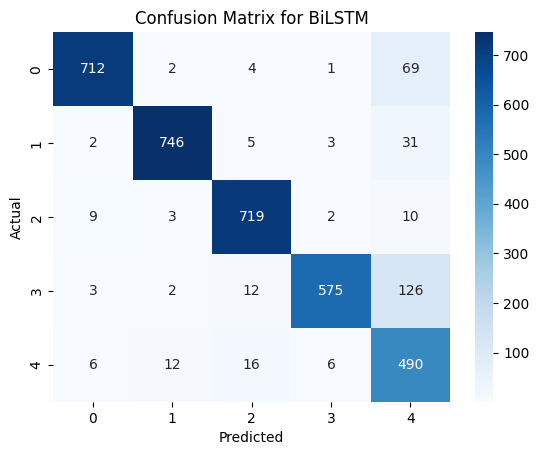

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_cnn_bilstm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for BiLSTM')
plt.show()

112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


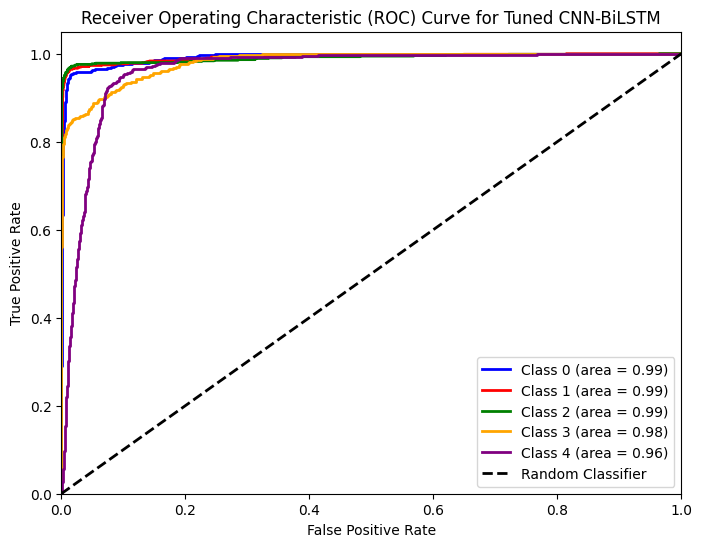

In [118]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4]) 
n_classes = y_test_binarized.shape[1]

# Get the predicted probabilities for each class
y_score = best_cnn_bilstm_model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

# Plot ROC curve for random classifier (diagonal)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Tuned CNN-BiLSTM')
plt.legend(loc="lower right")
plt.show()

# **Accuracy 0.91, 2 CNN Layers, 2 BiLSTM Layers, 2 Dropout Layers, Adam Optimizer, 0.001 Learning Rate, 64 Batch Size, 50 Epochs**

In [86]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dropout, Dense, BatchNormalization

cnn_bilstm_model = Sequential()
cnn_bilstm_model.add(Embedding(input_dim=10000, output_dim=128, input_length=97))
cnn_bilstm_model.add(BatchNormalization())
cnn_bilstm_model.add(Conv1D(filters=128, kernel_size=5, activation='relu')) #Convolutional Layer
cnn_bilstm_model.add(BatchNormalization())
cnn_bilstm_model.add(MaxPooling1D(pool_size=2))
cnn_bilstm_model.add(Conv1D(filters=64, kernel_size=5, activation='relu')) #Convolutional Layer
cnn_bilstm_model.add(BatchNormalization())
cnn_bilstm_model.add(MaxPooling1D(pool_size=2))
cnn_bilstm_model.add(Bidirectional(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.001))))
cnn_bilstm_model.add(Dropout(0.5))
cnn_bilstm_model.add(Bidirectional(LSTM(16, return_sequences=False, kernel_regularizer=l2(0.001))))
cnn_bilstm_model.add(Dropout(0.5))
cnn_bilstm_model.add(Dense(16, activation='relu')) # Fully connected layer
cnn_bilstm_model.add(Dense(5, activation='softmax'))

c:\Users\hp\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [87]:
cnn_bilstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
history = cnn_bilstm_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.5213 - loss: 1.3543 - val_accuracy: 0.4099 - val_loss: 1.4237
Epoch 2/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 30s 90ms/step - accuracy: 0.9083 - loss: 0.4311 - val_accuracy: 0.8456 - val_loss: 0.5052
Epoch 3/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 28s 86ms/step - accuracy: 0.9422 - loss: 0.2841 - val_accuracy: 0.9081 - val_loss: 0.3529
Epoch 4/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 28s 86ms/step - accuracy: 0.9626 - loss: 0.2003 - val_accuracy: 0.8739 - val_loss: 0.4251
Epoch 5/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 29s 86ms/step - accuracy: 0.9743 - loss: 0.1514 - val_accuracy: 0.9047 - val_loss: 0.3907
Epoch 6/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 29s 86ms/step - accuracy: 0.9788 - loss: 0.1183 - val_accuracy: 0.9075 - val_loss: 0.4202


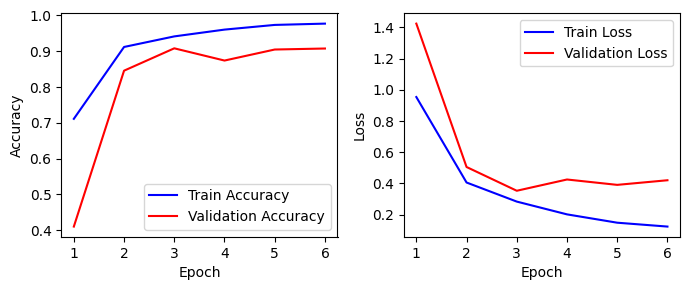

In [88]:
import matplotlib.pyplot as plt
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1) #acc can be loss/accuracy

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc2, 'b', label='Train Accuracy') # b = blue
axes[0].plot(epochs, val_acc, 'r', label='Validation Accuracy') # r = red
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

In [89]:
cnn_bilstm_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 97, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 97, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 93, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 93, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 46, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 42, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 42, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 21, 64)         │        24,832 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 32)             │        10,368 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,319,217 (16.48 MB)

 Trainable params: 1,439,525 (5.49 MB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 2,879,052 (10.98 MB)

In [90]:
#Evaluate the model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_cnn_bilstm = np.argmax(y_pred_cnn_bilstm, axis=1)  # Returns the index of the highest probability

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_cnn_bilstm)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print(classification_report(y_test, y_pred_cnn_bilstm))

112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       789
           1       0.94      0.98      0.96       787
           2       0.99      0.94      0.96       744
           3       0.92      0.85      0.88       719
           4       0.70      0.82      0.76       531

    accuracy                           0.91      3570
   macro avg       0.90      0.90      0.90      3570
weighted avg       0.92      0.91      0.91      3570



In [93]:
test_loss, test_accuracy = cnn_bilstm_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9161 - loss: 0.3206
Test Loss: 0.3417
Test Accuracy: 0.9095


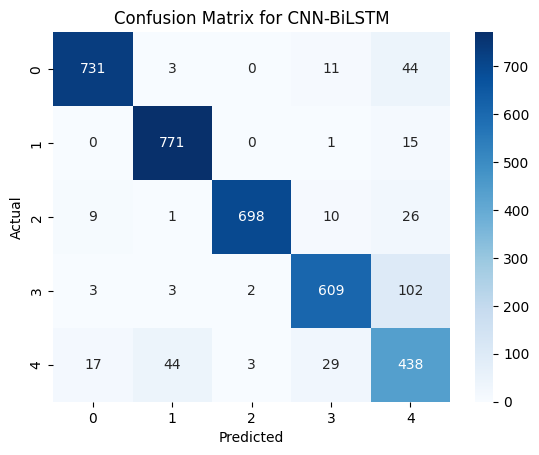

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_cnn_bilstm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CNN-BiLSTM')
plt.show()

112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


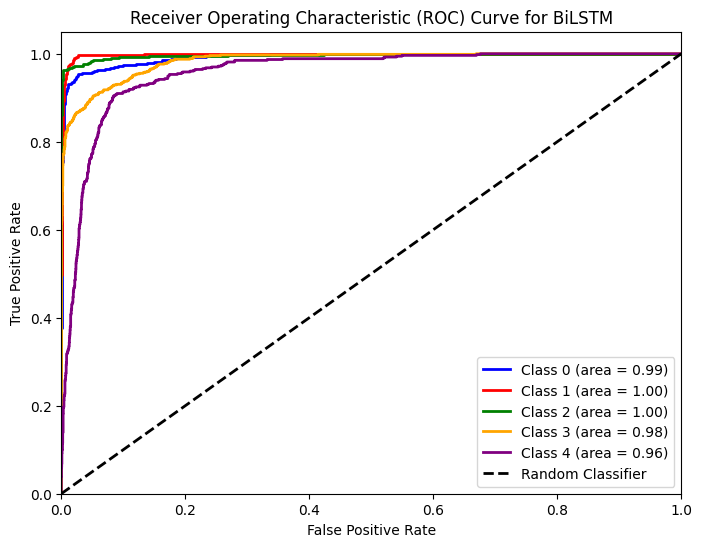

In [92]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the true labels (one-hot encode)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])  # Modify based on number of classes
n_classes = y_test_binarized.shape[1]

# Get the predicted probabilities for each class
y_score = cnn_bilstm_model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  # Add colors if more than 5 classes

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

# Plot ROC curve for random classifier (diagonal)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for BiLSTM')
plt.legend(loc="lower right")
plt.show()

# **Tuning**

In [140]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import kerastuner as kt

def build_cnn_bilstm_model(hp):
    filter1 = hp.Int('filter1', min_value=64, max_value=128, step=64)  # Dense units
    filter2 = hp.Int('filter2', min_value=64, max_value=128, step=64)  # Dense units
    units1 = hp.Int('units1', min_value=16, max_value=64, step=16)  # Dense units
    units2 = hp.Int('units2', min_value=8, max_value=32, step=8)  # Dense units
    units3 = hp.Int('units3', min_value=8, max_value=32, step=8)  # Dense units
    output = hp.Int('output', min_value=8, max_value=32, step=8)
    dropout1 = hp.Float('dropout1', min_value=0.4, max_value=0.6, step=0.1)
    dropout2 = hp.Float('dropout2', min_value=0.4, max_value=0.6, step=0.1)
    dropout3 = hp.Float('dropout3', min_value=0.0, max_value=0.6, step=0.2)
    activation_1 = hp.Choice('activation_1', values=['relu', 'tanh'])
    activation_2 = hp.Choice('activation_2', values=['relu', 'tanh'])
    activation_3 = hp.Choice('activation_3', values=['relu', 'tanh'])
    activation_4 = hp.Choice('activation_4', values=['relu', 'tanh'])
    batch_size = hp.Choice('batch_size', values=[32, 64])
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])  # Optimizer
    learning_rate = hp.Choice('learning_rate', values=[0.00001,0.0001, 0.001])  # Learning rate
    l2_reg1 = hp.Choice('l2_reg1', values=[0.001, 0.01])  # L2 regularization
    l2_reg2 = hp.Choice('l2_reg2', values=[0.001, 0.01])

    cnn_bilstm_model = Sequential()
    cnn_bilstm_model.add(Embedding(input_dim=10000, output_dim=output, input_length=97))
    cnn_bilstm_model.add(BatchNormalization())
    cnn_bilstm_model.add(Conv1D(filters=filter1, kernel_size=5, activation=activation_1)) #Convolutional Layer
    cnn_bilstm_model.add(BatchNormalization())
    cnn_bilstm_model.add(MaxPooling1D(pool_size=2))
    cnn_bilstm_model.add(Conv1D(filters=filter2, kernel_size=5, activation=activation_2)) #Convolutional Layer
    cnn_bilstm_model.add(BatchNormalization())
    cnn_bilstm_model.add(MaxPooling1D(pool_size=2))
    cnn_bilstm_model.add(Bidirectional(LSTM(units1, return_sequences=True, activation=activation_3, kernel_regularizer=l2(l2_reg1))))
    cnn_bilstm_model.add(Dropout(dropout1))
    cnn_bilstm_model.add(Bidirectional(LSTM(units2, return_sequences=False, activation=activation_4 ,kernel_regularizer=l2(l2_reg2))))
    cnn_bilstm_model.add(Dropout(dropout2))
    cnn_bilstm_model.add(Dense(units3, activation='relu')) # Fully connected layer
    cnn_bilstm_model.add(Dropout(dropout3))
    cnn_bilstm_model.add(Dense(5, activation='softmax'))

    # Optimizer with gradient clipping
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate, clipnorm=1.0)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate, clipnorm=1.0)
    else:
        optimizer = SGD(learning_rate=learning_rate, clipnorm=1.0)

    cnn_bilstm_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return cnn_bilstm_model

In [141]:
tuner = kt.Hyperband(build_cnn_bilstm_model,
                    objective='val_accuracy', 
                    max_epochs=20,
                    factor=3,
                    directory='my_dir',
                    project_name='hyperband_cnn_bilstm_2c2b')

c:\Users\hp\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [142]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
hyperband = tuner.search(X_train, y_train, validation_data=(X_val, y_val),
                         callbacks=[early_stopping])

Trial 30 Complete [00h 07m 30s]
val_accuracy: 0.24032530188560486

Best val_accuracy So Far: 0.9080201983451843
Total elapsed time: 01h 59m 19s


In [153]:
# Get the best hyperparameter
best_cnn_bilstm_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print('Best CNN-BiLSTM hyperparameters:', best_cnn_bilstm_hps.values)

Best CNN-BiLSTM hyperparameters: {'filter1': 64, 'filter2': 64, 'units1': 64, 'units2': 32, 'units3': 16, 'output': 8, 'dropout1': 0.5, 'dropout2': 0.4, 'dropout3': 0.4, 'activation_1': 'relu', 'activation_2': 'relu', 'activation_3': 'tanh', 'activation_4': 'relu', 'batch_size': 64, 'optimizer': 'rmsprop', 'learning_rate': 0.001, 'l2_reg1': 0.001, 'l2_reg2': 0.01, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [154]:
best_cnn_bilstm_model = tuner.hypermodel.build(best_cnn_bilstm_hps) #TEST
history = best_cnn_bilstm_model.fit(X_train, y_train, epochs=50, batch_size=best_cnn_bilstm_hps.get('batch_size'),
                                validation_data=(X_val, y_val), callbacks=[early_stopping])

c:\Users\hp\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 47s 83ms/step - accuracy: 0.4358 - loss: 2.3231 - val_accuracy: 0.2841 - val_loss: 1.8762
Epoch 2/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 0.8435 - loss: 0.5983 - val_accuracy: 0.8763 - val_loss: 0.4708
Epoch 3/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.8851 - loss: 0.4540 - val_accuracy: 0.9055 - val_loss: 0.3819
Epoch 4/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 0.9088 - loss: 0.3691 - val_accuracy: 0.8020 - val_loss: 0.6186
Epoch 5/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 32s 97ms/step - accuracy: 0.9219 - loss: 0.3291 - val_accuracy: 0.8786 - val_loss: 0.4689
Epoch 6/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.9318 - loss: 0.2803 - val_accuracy: 0.8797 - val_loss: 0.4316


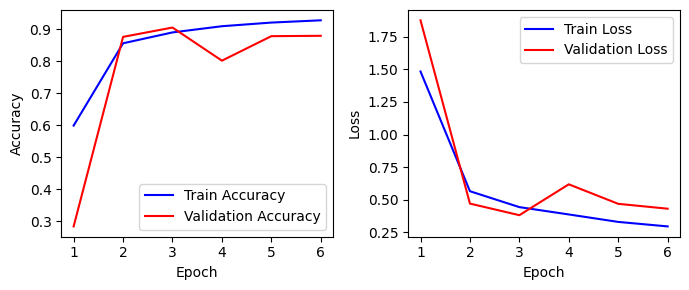

In [158]:
import matplotlib.pyplot as plt #TEST
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc, 'b', label='Train Accuracy') # b = blue
axes[0].plot(epochs, val_acc, 'r', label='Validation Accuracy') # r = red
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

In [159]:
#Evaluate the model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_cnn_bilstm = np.argmax(y_pred_cnn_bilstm, axis=1)  # Returns the index of the highest probability

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_cnn_bilstm)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print(classification_report(y_test, y_pred_cnn_bilstm))

112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       788
           1       0.97      0.96      0.96       787
           2       0.95      0.98      0.97       743
           3       0.91      0.85      0.88       718
           4       0.76      0.82      0.79       530

    accuracy                           0.92      3566
   macro avg       0.91      0.91      0.91      3566
weighted avg       0.92      0.92      0.92      3566



In [146]:
cnn_bilstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 97, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 97, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 93, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 93, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 46, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 42, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 42, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,462,385 (17.02 MB)

 Trainable params: 1,487,205 (5.67 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 2,974,412 (11.35 MB)

In [161]:
test_loss, test_accuracy = cnn_bilstm_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9144 - loss: 0.3529
Test Loss: 0.3332
Test Accuracy: 0.9184


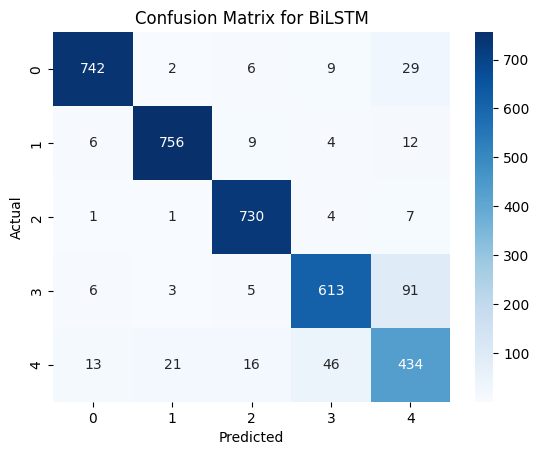

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_cnn_bilstm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for BiLSTM')
plt.show()

112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


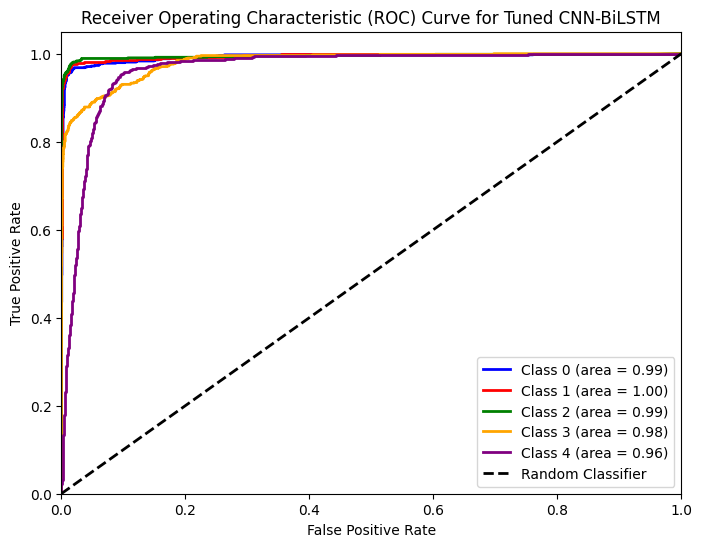

In [163]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4]) 
n_classes = y_test_binarized.shape[1]

# Get the predicted probabilities for each class
y_score = best_cnn_bilstm_model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

# Plot ROC curve for random classifier (diagonal)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Tuned CNN-BiLSTM')
plt.legend(loc="lower right")
plt.show()